# Support Vector Machines - Exercise 1

In this exercise, we'll be using support vector machines (SVMs) to build a spam classifier.  We'll start with SVMs on some simple 2D data sets to see how they work.  Then we'll do some pre-processing work on a set of raw emails and build a classifier on the processed emails using a SVM to determine if they are spam or not.

The first thing we're going to do is look at a simple 2-dimensional data set and see how a linear SVM works on the data set for varying values of C (similar to the regularization term in linear/logistic regression).  Let's load the data.
## Exercise 1
#### 1. Load libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. Load data
Load the file *ejer_1_data1.mat*. Find the way for loading this kind of file. **scipy.io.loadmat**

In [2]:
from scipy.io import loadmat

mat = loadmat('data/ejer_1_data1.mat')
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:43 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[1.9643  , 4.5957  ],
        [2.2753  , 3.8589  ],
        [2.9781  , 4.5651  ],
        [2.932   , 3.5519  ],
        [3.5772  , 2.856   ],
        [4.015   , 3.1937  ],
        [3.3814  , 3.4291  ],
        [3.9113  , 4.1761  ],
        [2.7822  , 4.0431  ],
        [2.5518  , 4.6162  ],
        [3.3698  , 3.9101  ],
        [3.1048  , 3.0709  ],
        [1.9182  , 4.0534  ],
        [2.2638  , 4.3706  ],
        [2.6555  , 3.5008  ],
        [3.1855  , 4.2888  ],
        [3.6579  , 3.8692  ],
        [3.9113  , 3.4291  ],
        [3.6002  , 3.1221  ],
        [3.0357  , 3.3165  ],
        [1.5841  , 3.3575  ],
        [2.0103  , 3.2039  ],
        [1.9527  , 2.7843  ],
        [2.2753  , 2.7127  ],
        [2.3099  , 2.9584  ],
        [2.8283  , 2.6309  ],
        [3.0473  , 2.2931  ],
        [2.4827  , 2.0373  ],
        [2.5057 

In [3]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

#### 3. Create a DataFrame with the features and target

In [4]:
df = pd.DataFrame(mat['X'], columns=['x1','x2'])
df['y'] = mat['y']
df.head()

,x1,x2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


In [5]:
df['y'].value_counts()

0    30
1    21
Name: y, dtype: int64

#### 4. Plot a scatterplot with the data

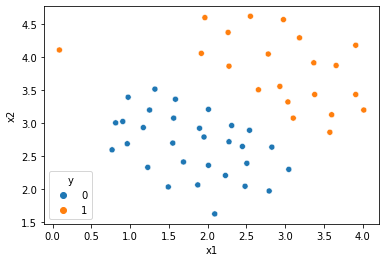

In [6]:
sns.scatterplot(data=df, x='x1', y='x2', hue="y");

Notice that there is one outlier positive example that sits apart from the others.  The classes are still linearly separable but it's a very tight fit.  We're going to train a linear support vector machine to learn the class boundary.

#### 5. LinearSVC
Declare a Linear SVC with the hyperparamenters:

```Python
LinearSVC(C=1, loss='hinge', max_iter=10000)
```

In [21]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C=1, loss='hinge', max_iter=10000)

#### 6. Try the performance (score)
For the first experiment we'll use C=1 and see how it performs.

In [22]:
X = df[['x1','x2']]
y = df['y']

svc.fit(X,y)
svc.score(X,y)

0.9803921568627451

It appears that it mis-classified the outlier.

#### 7. Increase the value of C until you get a perfect classifier

In [19]:
svc2 = LinearSVC(C=500, max_iter=100000)

In [20]:
svc2.fit(X,y)
svc2.score(X,y)

c:\Users\Miguel Angel\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


1.0

This time we got a perfect classification of the training data, however by increasing the value of C we've created a decision boundary that is no longer a natural fit for the data.  We can visualize this by looking at the confidence level for each class prediction, which is a function of the point's distance from the hyperplane.

#### 8. Plot Decission Function
Get the `decision_function()` output for the first model. Plot a scatterplot with X1, X2 and a range of colors based on `decision_function()`

In [33]:
conf_level = svc.decision_function(X)
conf_level

array([ 0.80331283,  0.38421778,  1.37793263,  0.52138561,  0.33344628,
        0.868805  ,  0.68669807,  1.61153593,  0.83481342,  1.16759922,
        1.07352306,  0.2299108 ,  0.33218564,  0.7962291 ,  0.31601113,
        1.27446561,  1.21045928,  1.00013519,  0.56484701,  0.39005542,
       -0.43501199, -0.30863141, -0.68613401, -0.55391814, -0.33235288,
       -0.29376856, -0.44071035, -0.98403848, -0.68560467, -1.32851296,
       -1.00376213, -1.49227229, -0.61126554, -0.6832506 , -0.99992747,
       -1.15269759, -1.5784475 , -1.35586542, -1.03222954, -1.18485224,
       -0.77113802, -0.76669913, -0.46620608, -1.        , -0.51025018,
       -0.85870673, -1.55916203, -0.25475537, -1.11345514, -1.5470927 ,
       -0.70950143])

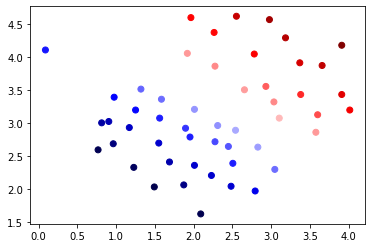

In [27]:
plt.scatter(df['x1'], df['x2'], c=conf_level, cmap='seismic')

#### 9. Do the same with the second model

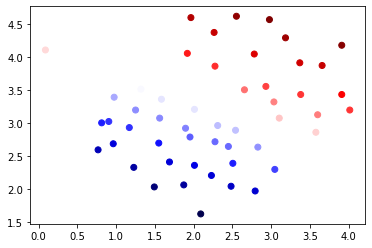

In [28]:
conf_level = svc2.decision_function(X)
plt.scatter(df['x1'], df['x2'], c=conf_level, cmap='seismic')

In [29]:
svc2.coef_

array([[2.60457591, 7.18198902]])

In [30]:
svc2.intercept_

array([-29.12793016])

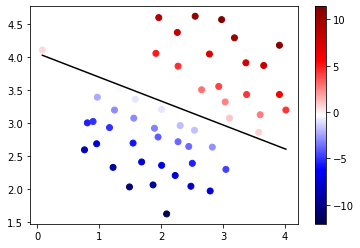

In [31]:
w = svc2.coef_[0]
b = svc2.intercept_[0]
x_points = df['x1'].sort_values()
y_points = -w[0]/w[1] * x_points - b/w[1]

plt.scatter(df['x1'], df['x2'], c=conf_level, cmap='seismic')
plt.plot(x_points, y_points, c='k')
plt.colorbar();

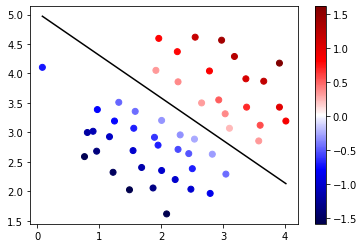

In [34]:
w = svc.coef_[0]
b = svc.intercept_[0]
x_points = df['x1'].sort_values()
y_points = -w[0]/w[1] * x_points - b/w[1]

plt.scatter(df['x1'], df['x2'], c=conf_level, cmap='seismic')
plt.plot(x_points, y_points, c='k')
plt.colorbar();

https://www.svm-tutorial.com/2015/06/svm-understanding-math-part-3/

Now we're going to move from a linear SVM to one that's capable of non-linear classification using kernels.  We're first tasked with implementing a gaussian kernel function.  Although scikit-learn has a gaussian kernel built in, for transparency we'll implement one from scratch.

## Exercise 2

That result matches the expected value from the exercise.  Next we're going to examine another data set, this time with a non-linear decision boundary.

#### 1. Load the data `ejer_1_data2.mat`

In [36]:
mat = loadmat('data/ejer_1_data2.mat')
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:54 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0.107143 , 0.60307  ],
        [0.093318 , 0.649854 ],
        [0.0979263, 0.705409 ],
        ...,
        [0.975806 , 0.439474 ],
        [0.989631 , 0.425439 ],
        [0.996544 , 0.414912 ]]),
 'y': array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
       

#### 2. Create a DataFrame with the features and target

In [37]:
df = pd.DataFrame(mat['X'], columns=['x1','x2'])
df['y'] = mat['y']
df.head()

,x1,x2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


#### 3. Plot a scatterplot with the data

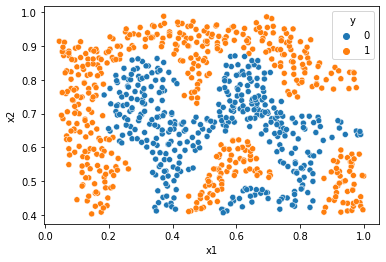

In [38]:
sns.scatterplot(data=df, x='x1', y='x2', hue="y");

For this data set we'll build a support vector machine classifier using the built-in RBF kernel and examine its accuracy on the training data.  To visualize the decision boundary, this time we'll shade the points based on the predicted probability that the instance has a negative class label.  We'll see from the result that it gets most of them right.

#### 4. Declare a SVC with this hyperparameters
```Python
SVC(C=100, gamma=10, probability=True)
```


In [60]:
from sklearn.svm import SVC

svc = SVC(C=100, gamma=10, probability=True)

#### 5. Fit the classifier and get the score

In [61]:
X = df[['x1','x2']]
y = df['y']


svc.fit(X,y)
svc.score(X,y)

0.9698725376593279

#### 6. Plot the scatter plot and probability of predicting 0 with a [sequential color](https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html)

In [62]:
y_pred_proba = svc.predict_proba(X)
y_pred_proba[:,0]

array([3.00000090e-14, 3.00000090e-14, 3.00000090e-14, 1.01936464e-06,
       6.22549294e-03, 2.80968349e-03, 1.39038407e-07, 1.12780465e-02,
       3.00000090e-14, 3.00000090e-14, 4.98782082e-14, 1.31232925e-02,
       1.86632716e-11, 3.00000090e-14, 3.00000090e-14, 7.69823070e-10,
       2.48062155e-01, 5.69229079e-01, 6.55940653e-14, 3.00000090e-14,
       1.52673896e-02, 1.40263183e-05, 9.28514503e-03, 1.22929147e-01,
       1.92935585e-02, 3.06222793e-06, 1.56071428e-06, 3.72832987e-07,
       4.41578966e-06, 2.39573149e-02, 1.61175910e-01, 2.92796847e-02,
       3.00000090e-14, 3.00000090e-14, 3.00000090e-14, 3.00000090e-14,
       3.00000090e-14, 8.04214190e-13, 6.42840522e-10, 1.06996172e-13,
       3.00000090e-14, 3.00000090e-14, 3.00000090e-14, 3.00000090e-14,
       3.00000090e-14, 3.00000090e-14, 3.00000090e-14, 2.88051805e-10,
       2.01392067e-13, 3.00000090e-14, 8.28682476e-09, 2.57122574e-07,
       1.38435531e-05, 2.43232689e-13, 3.00000090e-14, 3.00000090e-14,
      

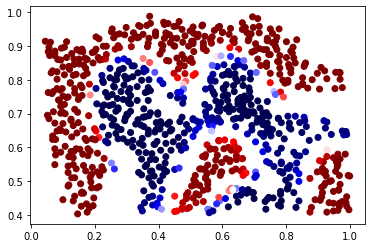

In [63]:
plt.scatter(df['x1'], df['x2'], c = y_pred_proba[:,1], cmap="seismic")

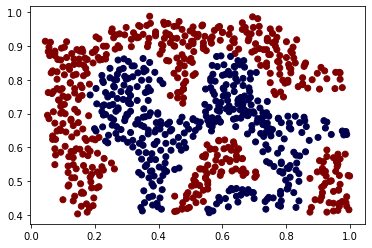

In [46]:
plt.scatter(df['x1'], df['x2'], c = y, cmap="seismic")